In [1]:
import pandas as pd

In [2]:
df_adv = pd.read_excel('AdventureWorks.xlsx')
df_aracaju = pd.read_excel('Aracaju.xlsx')
df_fortaleza = pd.read_excel('Fortaleza.xlsx')
df_natal = pd.read_excel('Natal.xlsx')
df_recife = pd.read_excel('Recife.xlsx')
df_salvador = pd.read_excel('Salvador.xlsx')

In [3]:
df_natal.dtypes


Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [4]:
df_adv.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

In [5]:
#juntando todos arquivos
df_vendas = pd.concat([df_aracaju, df_fortaleza, df_natal, df_recife, df_salvador])

In [6]:
df_vendas

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1


In [7]:
df_vendas['LojaID'] = df_vendas['LojaID'].astype('object') # alterando o tipo de dados do LojaID para object porque não será utilizado nenhum calculo

In [8]:
df_vendas.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [9]:
df_vendas.isnull().sum() # verificadno se tem valores nulos

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [10]:
#Criando nova coluna de Receita contendo o valor da venda multiplicado pela quantidade
df_vendas['Receita'] = df_vendas['Vendas'].mul(df_vendas['Qtde'])

In [11]:
df_vendas

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08
...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84
236,Salvador,2019-01-03,126.29,1035,3,378.87
237,Salvador,2019-01-03,38.06,1036,3,114.18
238,Salvador,2019-01-03,139.64,1035,1,139.64


In [12]:
df_vendas.nlargest(3, 'Receita') # Mostra os dados das 3 maiores Receitas

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [13]:
df_vendas.nsmallest(3, 'Receita') # Mostra os dados das 3 menores Receitas

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [14]:
#AAagrupamento de Receita por cidade
df_vendas.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [15]:
df_vendas.sort_values('Receita', ascending=False) # ordenando os valores de Receita por ordem decrescente

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.00,853,4,3544.00
55,Natal,2019-01-08,859.00,854,4,3436.00
51,Natal,2018-01-21,859.00,852,4,3436.00
30,Natal,2018-10-02,856.00,853,4,3424.00
41,Natal,2018-05-20,835.00,852,4,3340.00
...,...,...,...,...,...,...
95,Natal,2019-01-02,5.13,1035,1,5.13
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57
65,Recife,2019-01-01,4.01,981,1,4.01


In [16]:
#Agrupamento por ano
df_vendas.groupby(df_vendas['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [17]:
#Criando uma nova coluna com o ano
df_vendas['Ano_Venda'] = df_vendas['Data'].dt.year

In [19]:
df_vendas.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
26,Aracaju,2018-01-01,6.98,1521,10,69.80,2018
227,Salvador,2019-01-02,14.70,1035,1,14.70,2019
208,Natal,2019-01-02,39.40,1036,3,118.20,2019
108,Recife,2019-03-02,152.89,981,4,611.56,2019
79,Natal,2019-02-28,557.00,852,4,2228.00,2019


In [20]:
#extraindo o mes e o dia da venda
df_vendas['Mes_Venda'], df_vendas['Dia_Venda'] = (df_vendas['Data'].dt.month, df_vendas['Data'].dt.day)

In [21]:
df_vendas.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
77,Aracaju,2018-01-01,24.10,1522,1,24.10,2018,1,1
128,Fortaleza,2019-03-02,38.70,982,4,154.80,2019,3,2
156,Natal,2019-01-02,36.14,1037,3,108.42,2019,1,2
32,Recife,2019-01-01,15.93,982,7,111.51,2019,1,1
207,Salvador,2019-01-02,46.70,1036,2,93.40,2019,1,2


In [22]:
df_vendas['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [23]:
df_vendas['Data'].max()

Timestamp('2019-04-05 00:00:00')

In [24]:
#extraindo vendas do trimestre
df_vendas['trimestre_venda'] = df_vendas['Data'].dt.quarter

In [26]:
df_vendas.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,trimestre_venda
91,Salvador,2019-01-01,17.74,1035,1,17.74,2019,1,1,1
45,Natal,2019-03-11,431.00,852,3,1293.00,2019,3,11,1
1,Natal,2018-11-25,563.00,853,2,1126.00,2018,11,25,4
23,Natal,2019-02-14,304.00,854,3,912.00,2019,2,14,1
132,Recife,2019-03-02,17.49,983,5,87.45,2019,3,2,1


In [28]:
#filtrando vendas de marco
vendas_marco_2019 = df_vendas.loc[(df_vendas['Data'].dt.year == 2019) & (df_vendas['Data'].dt.month == 3)]

In [31]:
vendas_marco_2019['Vendas'].sum()


19321.23

In [33]:
df_vendas['LojaID'].value_counts(ascending=False) # mostra a quantidade de valores iguais, no caso 'LojaID'

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

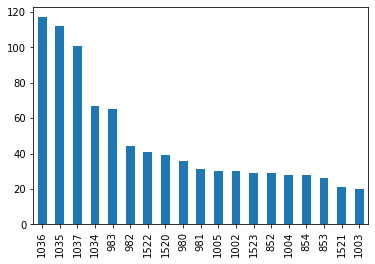

In [38]:
df_vendas['LojaID'].value_counts(ascending=False).plot.bar();

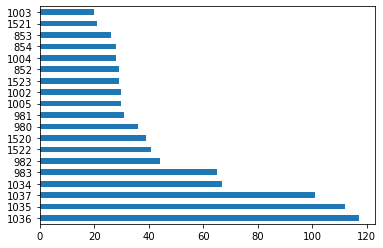

In [37]:
df_vendas['LojaID'].value_counts(ascending=False).plot.barh();

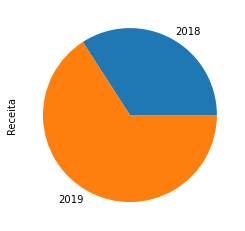

In [44]:
df_vendas.groupby(df_vendas['Data'].dt.year)['Receita'].sum().plot.pie();

In [46]:
df_vendas['Cidade'].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

In [48]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Quantidade vendas')

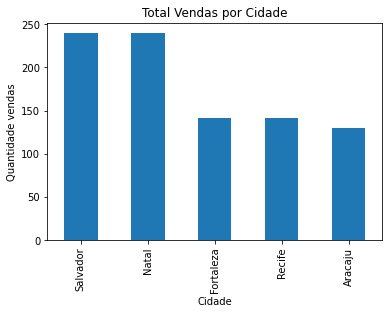

In [56]:
df_vendas['Cidade'].value_counts().plot.bar(title='Total Vendas por Cidade');
plt.xlabel('Cidade')
plt.ylabel('Quantidade vendas')

Text(0, 0.5, 'Quantidade vendas')

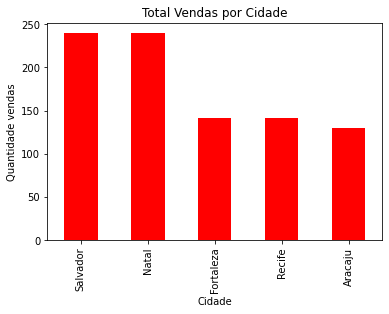

In [58]:
df_vendas['Cidade'].value_counts().plot.bar(title='Total Vendas por Cidade', color='red');
plt.xlabel('Cidade')
plt.ylabel('Quantidade vendas')

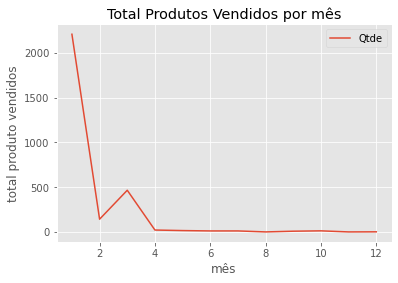

In [71]:
plt.style.use('ggplot')
df_vendas.groupby(df_vendas['Mes_Venda'])['Qtde'].sum().plot(title='Total Produtos Vendidos por mês');
plt.xlabel('mês')
plt.ylabel('total produto vendidos');
plt.legend();

In [78]:
df_vendas_2019 = df_vendas[df_vendas['Data'].dt.year == 2019]


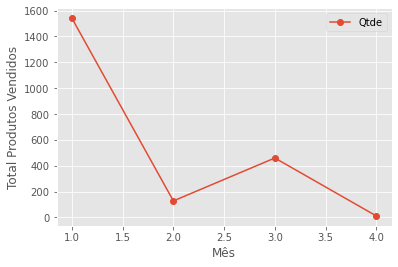

In [94]:
df_vendas_2019.groupby(df_vendas_2019['Mes_Venda'])['Qtde'].sum().plot(marker = 'o');
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();
plt.savefig('grafico.png')

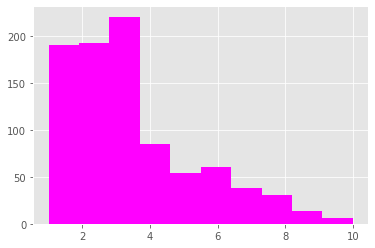

In [93]:
plt.hist(df_vendas['Qtde'], color = 'magenta');